| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

**Authors:** Andrej Gajdoš, Martina Hančová, Jozef Hanč  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [andrej.gajdos@student.upjs.sk](mailto:andrej.gajdos@student.upjs.sk), [martina.hancova@upjs.sk](mailto:martina.hancova@upjs.sk)
***
**<font size=6 color=brown> FDSLRM applications - Strikes </font>**  

<font size=5> Number of strikes in the USA </font> 

<a id=table_of_contents></a>
###  Table of Contents 
* [Data and model](#data_and_model) - data and model description, estimating parameters, software
* [Modeling](#modeling) - loading R functions and packages, data plot, periodogram
* [Residual diagnostics](#residual_diagnostics) - description of graphical tools, numerical tests
* [Fitting summary](#fitting_summary) - estimated model parameters, fit summary
* [Session info](#session_info) - list of applied R packages in computations
* [References](#references) - list of detailed references for data and applied methods

**To get back to the contents, use <font color=brown>the Home key</font>.**

***
<a id=data_and_model></a>
# <font color=brown>Data and model </font>


### Data description

In this FDSLRM application we model the time series data set, denoted as `strikes`, representing *number of strikes*. The number of time series observations is $n=30$, the correspoding plot with more details is shown in the following section **_Modeling_**. The data was adapted from *Brockwell & Davis, 2016*.


### Model description

The mink trappings data can be succesfully fitted by the FDSLRM of the form:

$$ Z(t)=\beta_1+\beta_2\cos\left(\tfrac{2\pi t}{30}\right)+\beta_3\sin\left(\tfrac{2\pi t\cdot}{30}\right)+\beta_4\sin\left(\tfrac{2\pi t\cdot 2}{30}\right)
+w(t), \, t\in \mathbb{N},$$ 

where $Z(t)=log(X(t))$ is the logarithmic transformation of the orginal data to make the variance more stable so that we can achieve the better fit.

### Computational software
As for numerical calculations, we conducted our computations in _the R statistical computing language_ (https://www.r-project.org; _R Development Core Team, 2019_) and with R functions designed to work with FDSLRM programmed by authors of the Jupyter notebook included in _fdslrm_ (Gajdoš et. al., 2019) package. The complete list of used R libraries is included in **_Session info_**.

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=modeling></a>
# <font color=brown>Modeling </font>

### Loading R functions and packages

In [1]:
# devtools::install_github("gajdosandrej/fdslrm")

In [1]:
library(fdslrm)
initialFDSLRM()

### Read data

Number of strikes in the USA 1951-1980 (thousands).

In [2]:
# reading data
x <- ts(as.numeric(read.table("data/strikes.tsm", header = FALSE)[,1]), start = 1951, frequency = 1)
# logarithmic transformation of data
z <- log(x)
# times
t <- 1:length(z)

### Data plot

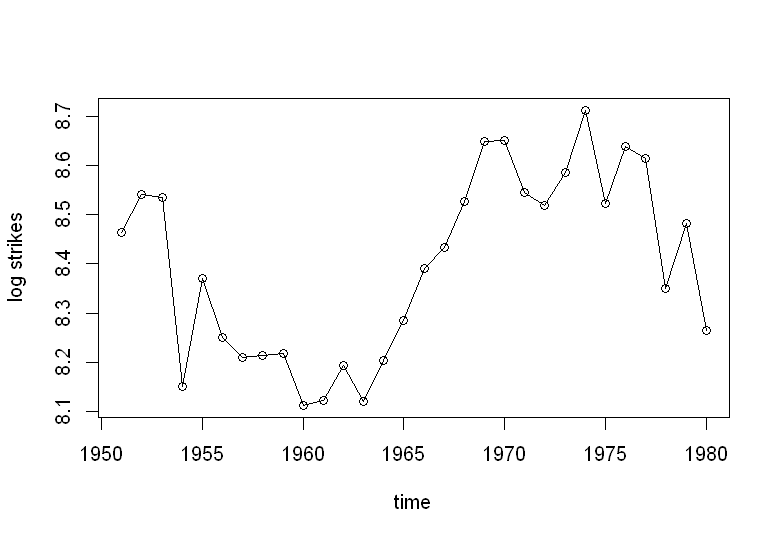

In [3]:
# IPython setting for output
options(repr.plot.res=120, repr.plot.height=4.5, repr.plot.width=6.5)

# plotting data 
plot(z, type = "o", xlab = "time", ylab = "log strikes")

### Spectral analysis - Periodogram 

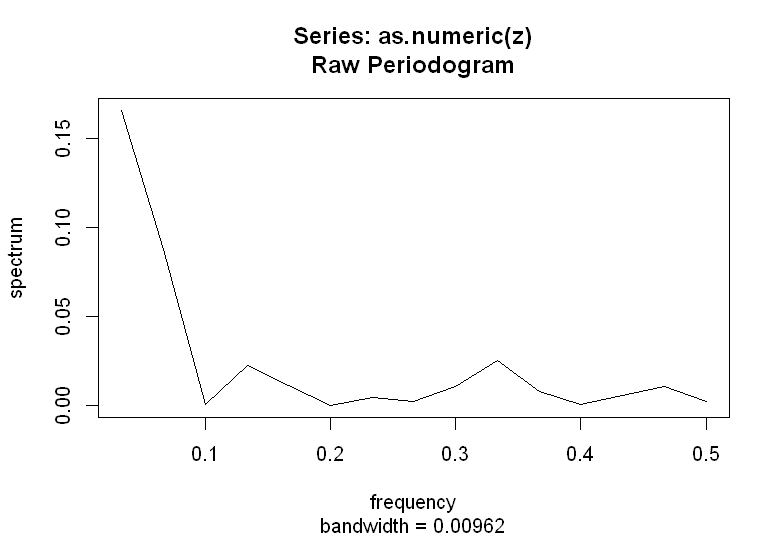

In [4]:
periodo <- spec.pgram(as.numeric(z), log="no")

#### Six most significant frequencies according to values of spectrum in periodogram

In [5]:
drawTable(type = "periodogram", periodogram = periodo)

spectrum,0.1656323,0.0877386,0.0251776,0.0226232,0.0111825,0.0107573
frequency (raw),0.0333333,0.0666667,0.3333333,0.1333333,0.1666667,0.4666667


In [6]:
# orders k for Fourier frequencies
print(round(length(z)*c(0.0333333,0.0666667,0.3333333,0.1333333,0.1666667,0.4666667)))

[1]  1  2 10  4  5 14


In [7]:
fnames= c("1/30", "$2/30$", "$10/30$", "$4/30$", "$5/30$", "$14/30$")
drawTable(type = "periodogram", periodogram = periodo, frequencies = fnames)

spectrum,0.16563235,0.08773856,0.02517756,0.02262317,0.01118248,0.01075730
frequency (raw),0.03333333,0.06666667,0.33333333,0.13333333,0.16666667,0.46666667
frequency,$1/30$,$$2/30$$,$$10/30$$,$$4/30$$,$$5/30$$,$$14/30$$


| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=residual_diagnostics></a>
# <font color=brown> Residual diagnostics </font>

### Graphical (exploratory) tools 

>
>|$ $|$\large\mbox{Graphical-tools diagnostic matrix}$|$ $|
|---|------------------------------------------------|---| 
|   |   
|$\mbox{linearity of fixed effects (L)}$| $\mbox{outlying observations (O1)}\hspace{0.75cm}$ | $\mbox{independence of cond. errors (ACF)} $ |
|**stand. marg. residuals vs marg. fitted values**|**stand. marg. residuals vs times**$\hspace{0.75cm}$|**ACF of cond. residuals**|
|   |  
|$\mbox{homoscedascity of cond. errors (H)}$|$\mbox{outlying observations (O2)}\hspace{0.75cm}$|$\mbox{independence of cond. errors (PACF)} $ |
|**stand. cond. residuals vs cond. predictions**|**stand. cond. residuals vs times**$\hspace{0.75cm}$|**PACF of cond. residuals**|
|   | 
|$\mbox{normality of cond. errors (N1)}$|$\mbox{normality of cond. errors (N2)}\hspace{0.75cm}$|$\mbox{normality of cond. errors (N3)} $ |
|**histogram of cond. residuals**|**histogram of stand. least conf. residuals**$\hspace{0.75cm}$|**stand. least conf. residuals vs $\mathcal{N}(0,1)$ quantiles**|

More details about modelling procedure, diagnostic tools and technical information can be found in our extended illustration examples [cyberattacks](https://nbviewer.jupyter.org/github/fdslrm/EBLUP-NE/blob/master/Modeling/cyberattacks.ipynb), [tourism]( https://nbviewer.jupyter.org/github/fdslrm/EBLUP-NE/blob/master/Modeling/tourism.ipynb). Analogical steps of modelling and criteria of models quality also apply here. 

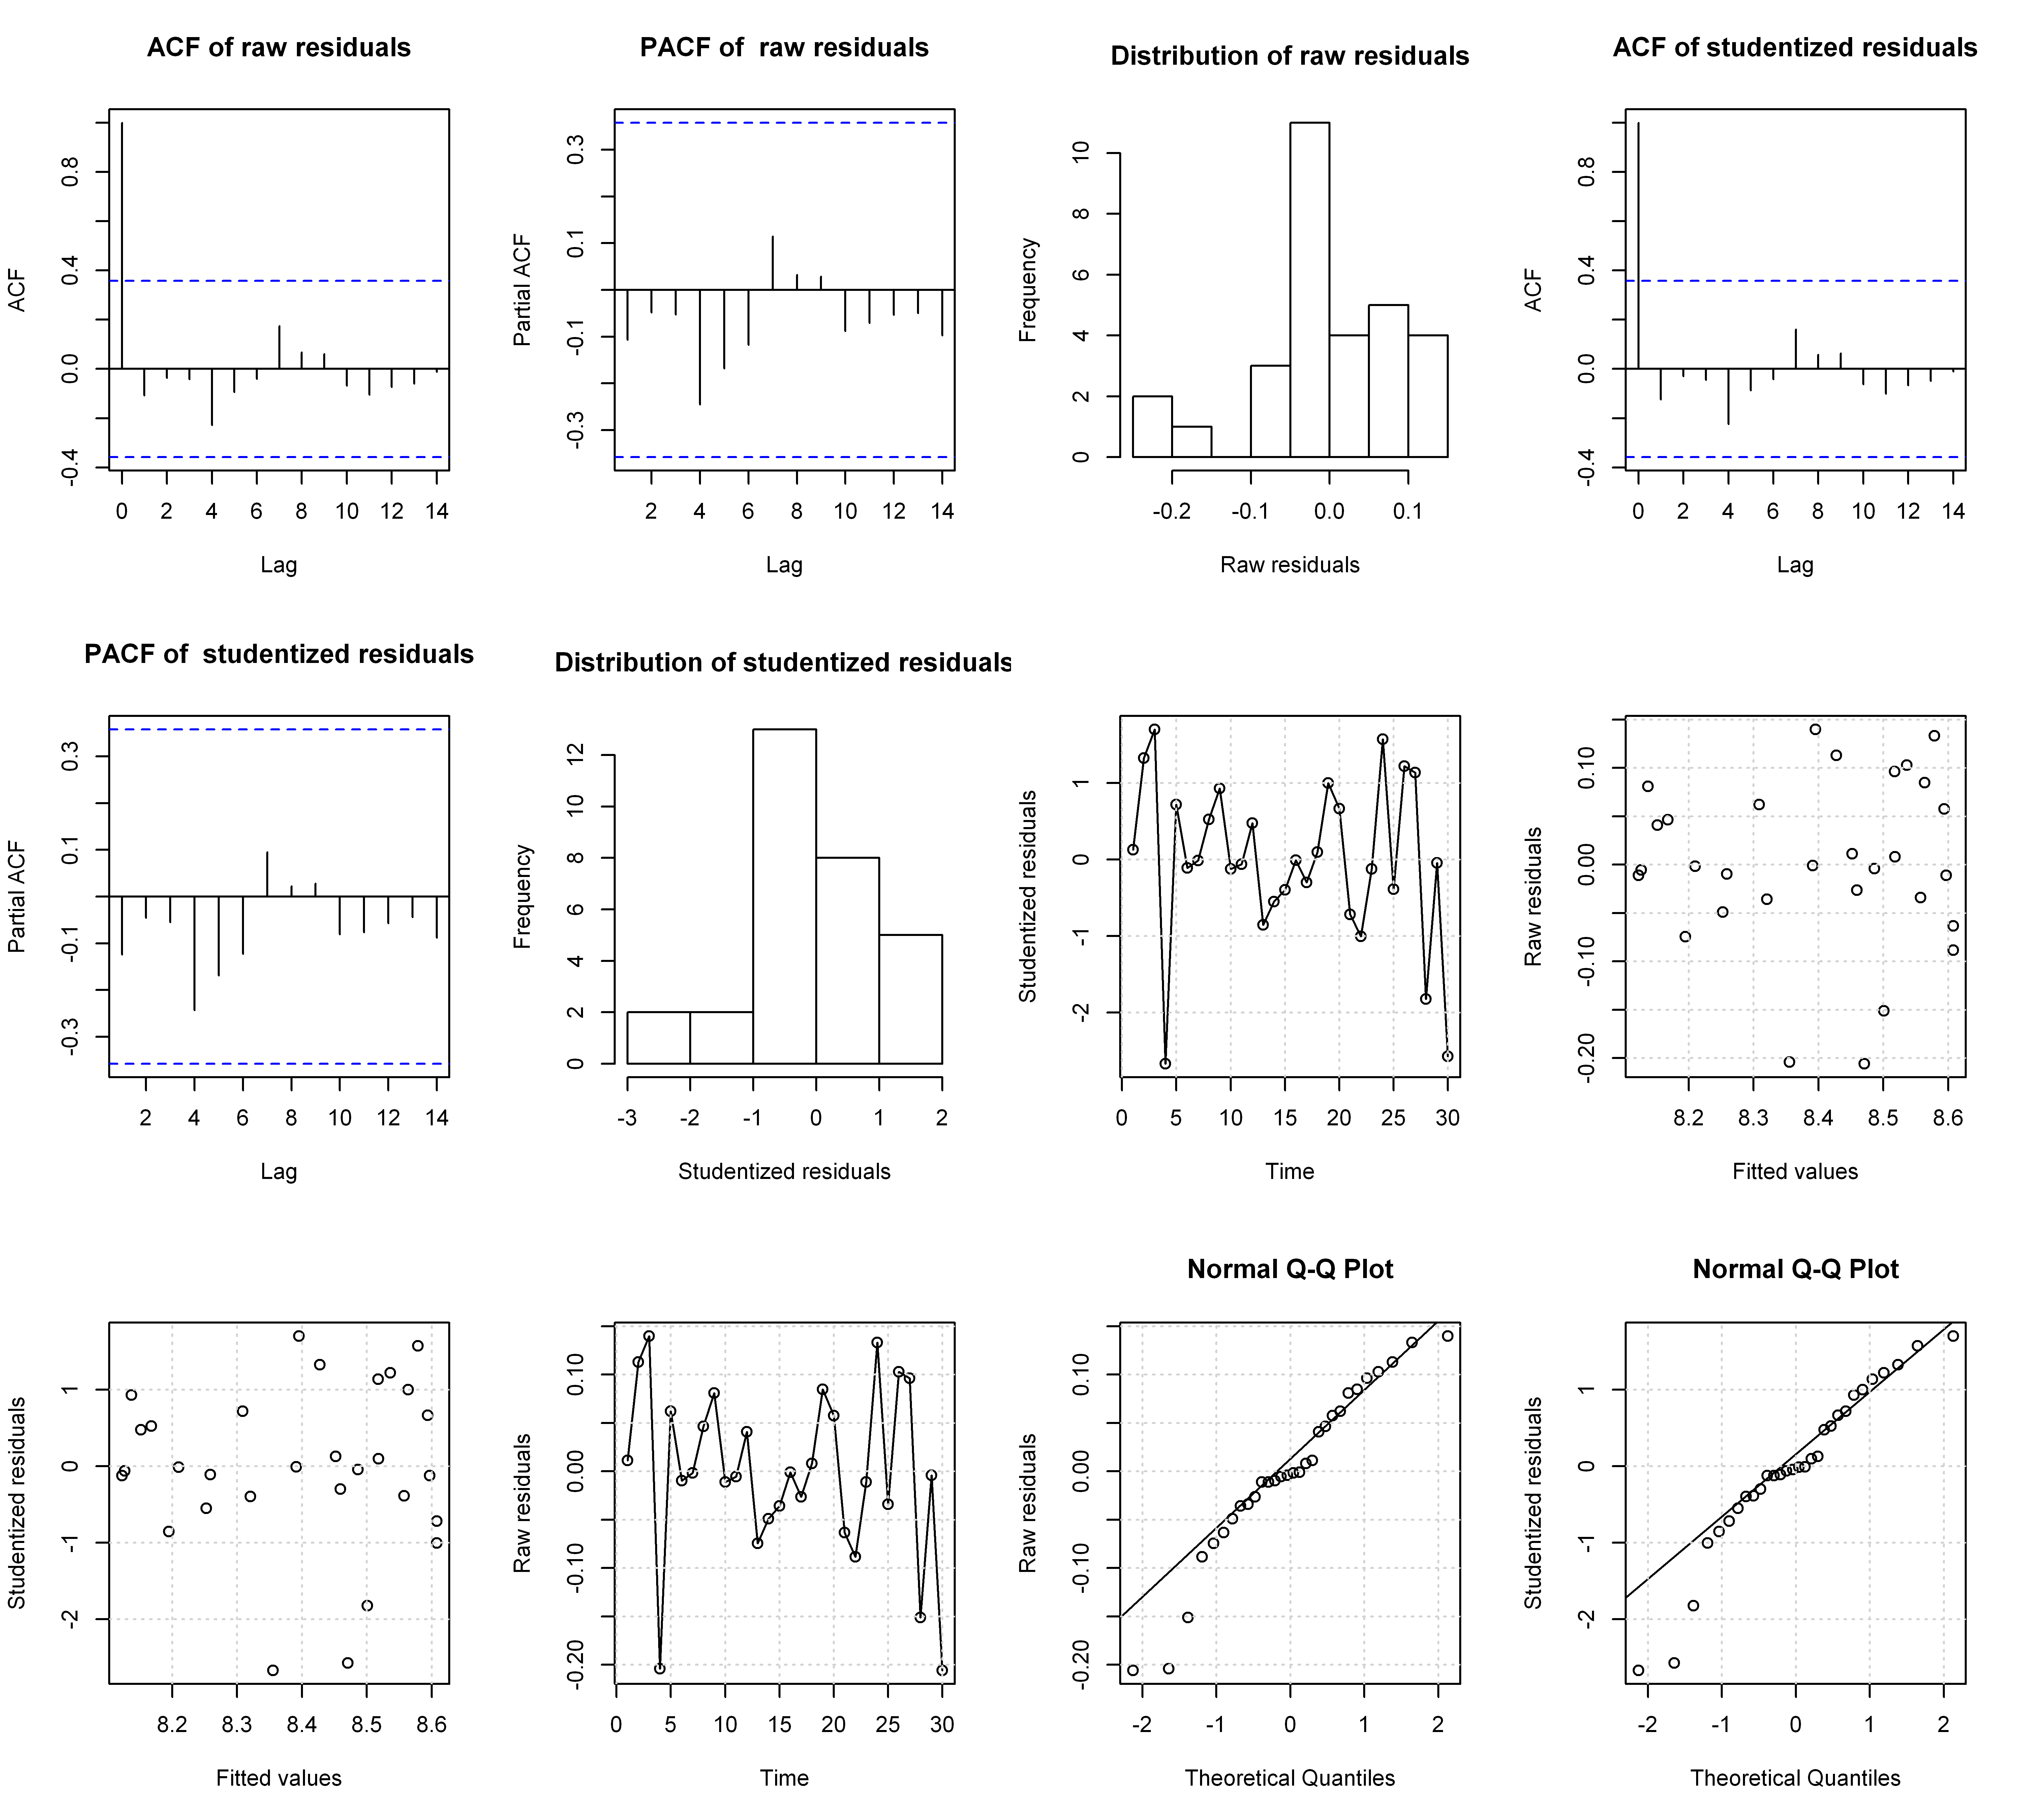

In [8]:
# Fitting the final FDSLRM
# output <- fitDiagFDSLRM(z, t, c(1/30,2/30), include_fixed_eff = c(1,1,0,1), 
#                           freq_random = c(3/30), poly_trend_degree = 0)

# options(repr.plot.res=600, repr.plot.height=9, repr.plot.width=10)
# drawDiagPlots("all", output)

output <- fitDiagFDSLRM(as.numeric(z), t, c(1/30,2/30), include_fixed_eff = c(1,1,0,1), poly_trend_degree = 0)

options(repr.plot.res=600, repr.plot.height=9, repr.plot.width=10)
drawDiagPlots("all", output)

### Numerical tests

#### Tests of residual independence

In [9]:
# print(output$Box_test_lag10_resid)
# print(output$BoxLjung_test_lag10_resid)

print(output$Box_tests_stud_resid)
print(output$BoxLjung_test_stud_resid)


	Box-Pierce test

data:  resid(fit)
X-squared = 0.34393, df = 1, p-value = 0.5576


	Box-Ljung test

data:  MASS::studres(fit)
X-squared = 0.50883, df = 1, p-value = 0.4756



#### Test of residual normality

In [10]:
# print(output$ShapiroWilk_test_norm_cond_resid)
# print(output$ShapiroWilk_test_stand_least_conf_resid)

print(output$ShapiroWilk_test_raw_resid)
print(output$ShapiroWilk_test_stud_resid)


	Shapiro-Wilk normality test

data:  resid(fit)
W = 0.94717, p-value = 0.1419


	Shapiro-Wilk normality test

data:  MASS::studres(fit)
W = 0.93771, p-value = 0.07891



| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=fitting_summary></a>
# <font color=brown> Fitting summary </font>

### Parameter estimates

#### Estimates of regression coefficients

In [11]:
drawTable(type = "fixed", fixed_eff = output$fixed_effects)

,$\beta_{1}$,$\beta_{2}$,$\beta_{3}$,$\beta_{4}$
,8.395633,0.0750977,-0.2076621,0.0642178


#### Estimates of variance parameters

In [12]:
output$error_variance

[1] 0.008650138

### Fit summary

#### Graphical  summary for the final model
* plot: **time series observations (black), fitted values (blue)**

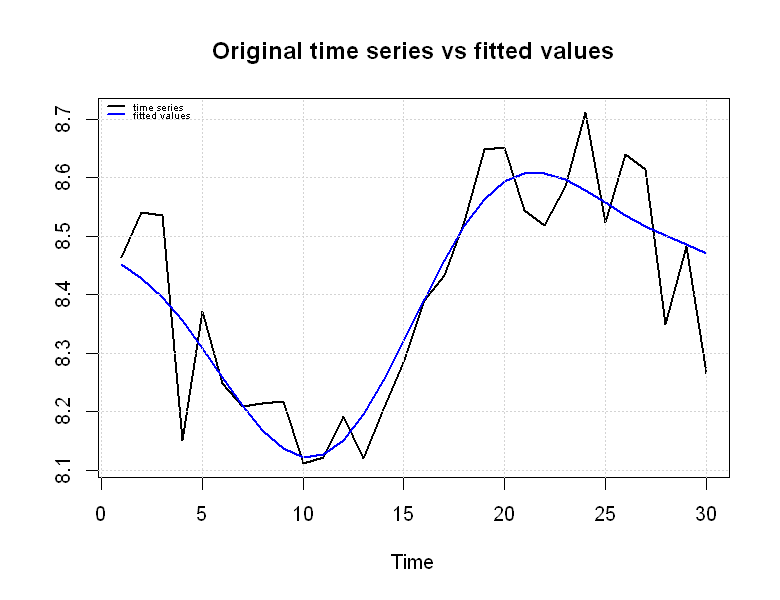

In [13]:
options(repr.plot.res=120, repr.plot.height=5, repr.plot.width=6.5)
drawDiagPlots(output$diagnostic_plots_names$FittedTimeSeries, output)

#### Numerical summary for the final model

In [14]:
print(output$fit_summary)


Call:
lm(formula = as.formula(paste("x~1+", paste(names(d)[1:(kk - 
    1)], collapse = "+"))), data = d, model = TRUE, x = TRUE)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.205852 -0.035342 -0.002855  0.060913  0.139828 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.39563    0.01698 494.427  < 2e-16 ***
f2           0.07510    0.02401   3.127  0.00431 ** 
f3          -0.20766    0.02401  -8.648 3.99e-09 ***
f4           0.06422    0.02401   2.674  0.01278 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09301 on 26 degrees of freedom
Multiple R-squared:  0.7791,	Adjusted R-squared:  0.7536 
F-statistic: 30.57 on 3 and 26 DF,  p-value: 1.111e-08



| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=session_info></a>
# <font color=brown> Session info </font>

In [15]:
print(sessionInfo())

R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 8.1 x64 (build 9600)

Matrix products: default

locale:
[1] LC_COLLATE=Slovak_Slovakia.1250  LC_CTYPE=Slovak_Slovakia.1250   
[3] LC_MONETARY=Slovak_Slovakia.1250 LC_NUMERIC=C                    
[5] LC_TIME=Slovak_Slovakia.1250    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] CVXR_0.99-4      pracma_2.2.5     gnm_1.1-0        sommer_3.9.3    
 [5] crayon_1.3.4     lattice_0.20-38  matrixcalc_1.0-3 fpp2_2.3        
 [9] expsmooth_2.3    fma_2.3          ggplot2_3.1.1    forecast_8.7    
[13] nlme_3.1-139     car_3.0-2        carData_3.0-2    Matrix_1.2-17   
[17] MASS_7.3-51.4    IRdisplay_0.7.0  kableExtra_1.1.0 fdslrm_0.1.0    

loaded via a namespace (and not attached):
 [1] xts_0.11-2        scs_1.2-3         bit64_0.9-7       webshot_0.5.1    
 [5] httr_1.4.0        repr_1.0.0        tools_3.5.1       R6_

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 

***
<a id=references></a>
# <font color=brown> References </font>


* Brockwell, P. J., Davis, R. A. (2016). [Introduction to Time Series and Forecasting (3rd ed.)](https://www.springer.com/la/book/9783319298528). New York, NY: Springer


* Gajdoš, A., Hanč, J., Hančová, M. (2019), [R package for modeling and prediction of time series using linear mixed models](https://github.com/fdslrm/R-package)


* R Core Team (2019). R: A language and environment for statistical computing. R Foundation for
  Statistical Computing, Vienna, Austria. URL: https://www.R-project.org/

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | 